In [15]:
import os
os.chdir("C:/Users/logesh/Downloads")

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('abalone.csv')

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

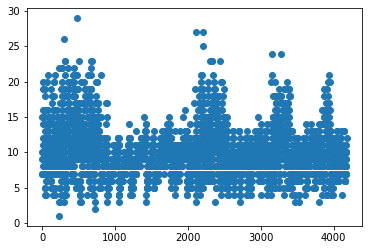

In [8]:
plt.scatter(df.index,df['Rings'])
plt.show

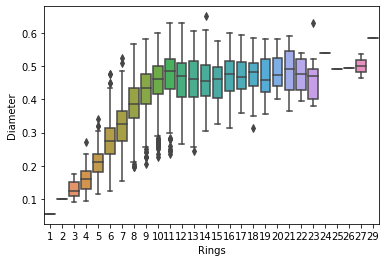

In [19]:
sns.boxplot(x='Rings' ,y='Diameter', data = df)
plt.show()

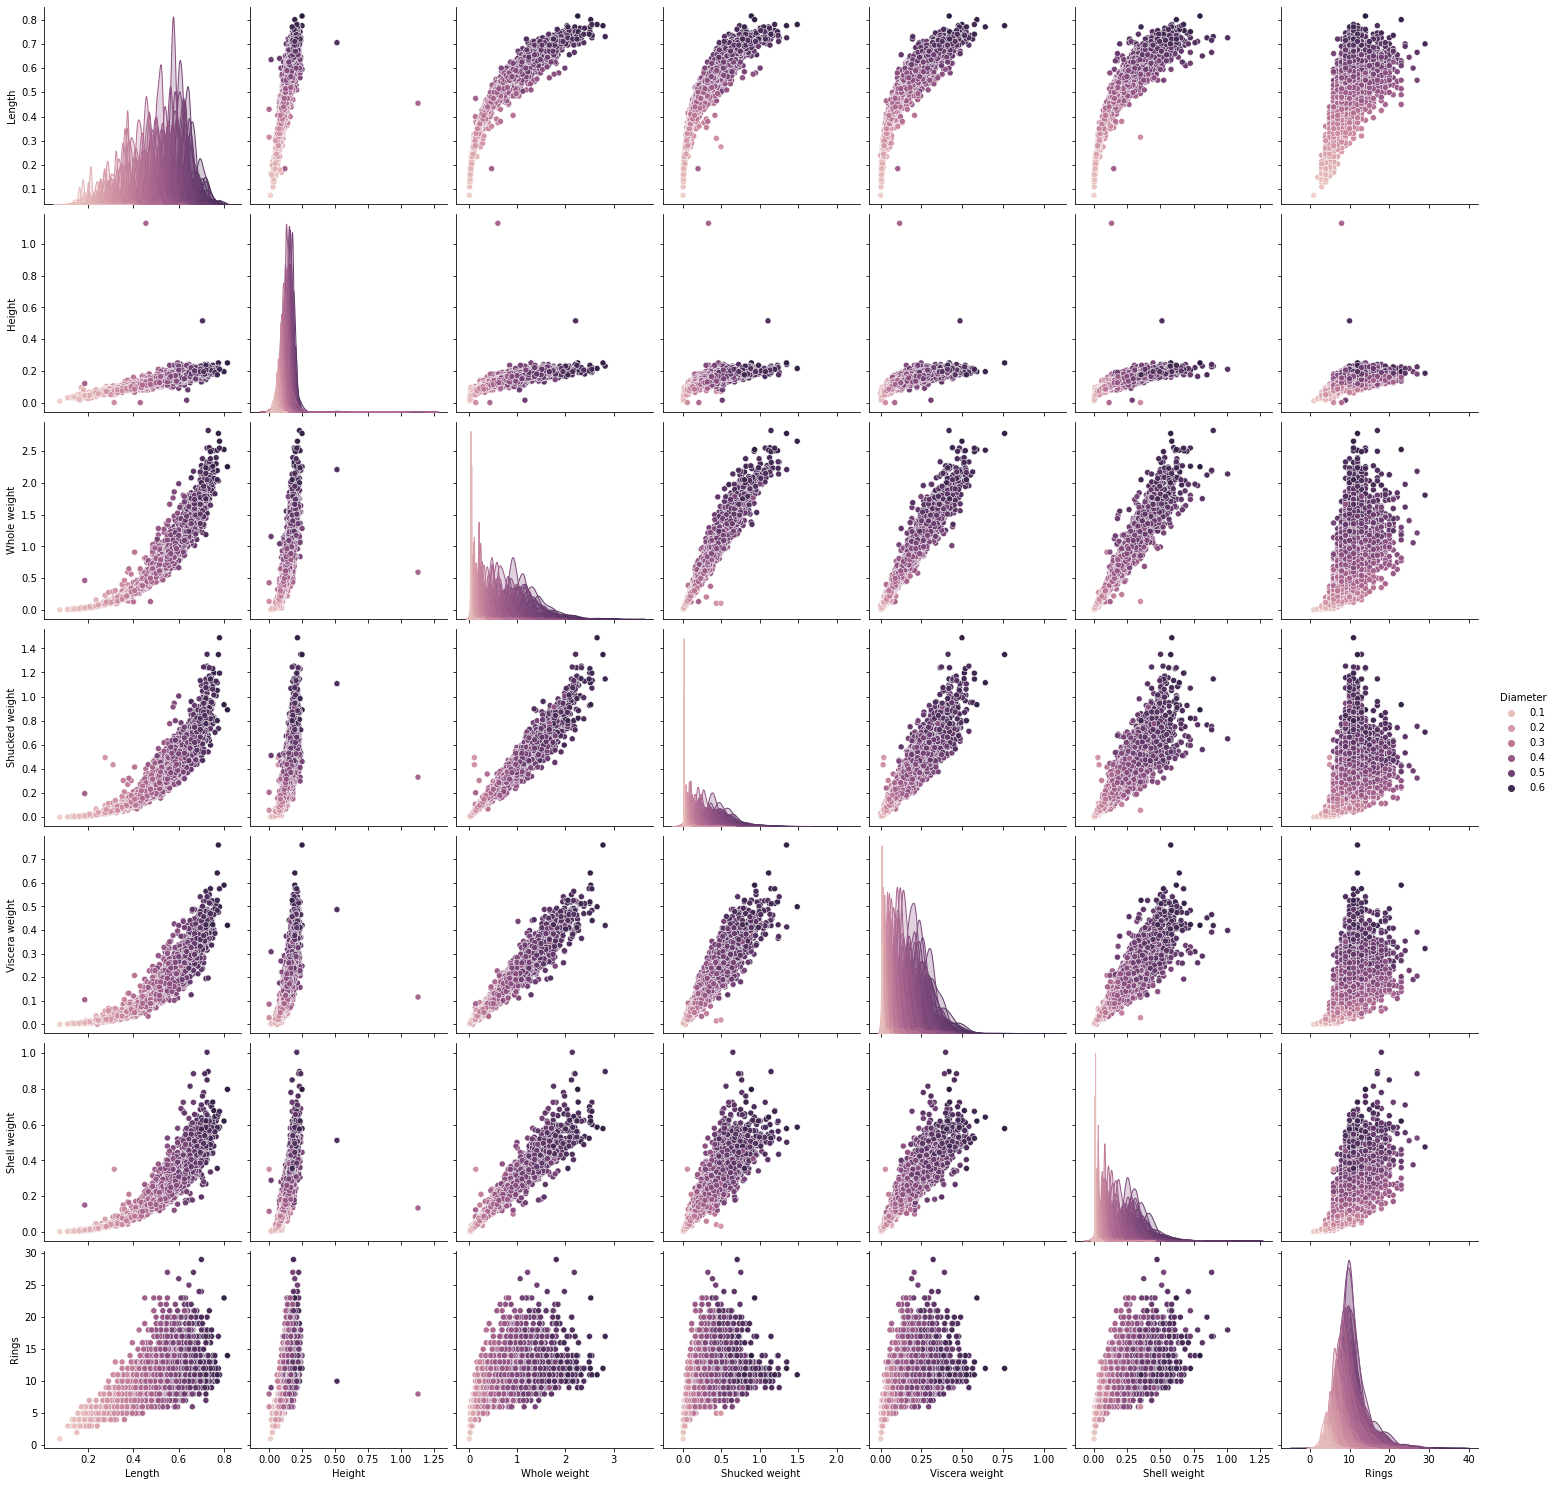

In [21]:
sns.pairplot(df, hue="Diameter", height = 3)
plt.show()

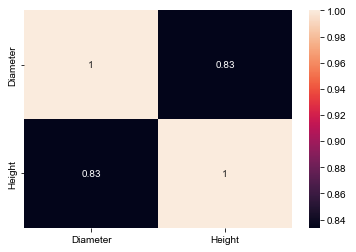

In [22]:
df = df[['Diameter','Height']]
sns.heatmap(df.corr(), annot = True)
sns.set(rc = {'figure.figsize':(10,10)})

In [23]:
df.isnull().sum()

Diameter    0
Height      0
dtype: int64

In [24]:
df.describe()

,Diameter,Height
count,4177.000000,4177.000000
mean,0.407881,0.139516
std,0.099240,0.041827
min,0.055000,0.000000
25%,0.350000,0.115000
50%,0.425000,0.140000
75%,0.480000,0.165000
max,0.650000,1.130000


In [26]:
df['Height'].isnull().sum()

0

In [27]:
df['Height'].mean()

0.1395163993296614

In [28]:
df['Height'].replace(np.NaN, df['Height'].mean()).head(15)

0     0.095
1     0.090
2     0.135
3     0.125
4     0.080
5     0.095
6     0.150
7     0.125
8     0.125
9     0.150
10    0.140
11    0.110
12    0.135
13    0.145
14    0.100
Name: Height, dtype: float64

In [29]:
df['Height'].mode()

0    0.15
Name: Height, dtype: float64

In [30]:
df['Height'].median()

0.14

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
Encorder = OneHotEncoder(sparse=False)
cat_cols = ['Rings']

In [35]:
from sklearn.preprocessing import StandardScaler
df_ready = df.copy()

In [36]:
scaler = StandardScaler()
num_cols = ['Length','Diameter','Height','whole weight','Shucked weight','Viscera weight','Shell weight']

In [42]:
df_ready.head()

,Diameter,Height
0,0.365,0.095
1,0.265,0.090
2,0.420,0.135
3,0.365,0.125
4,0.255,0.080


In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['Sex']

In [ ]:
df_ready = pd.concat([df_encoded, df_ready], axis = 1)

In [52]:
df_ready['Height'] = df_ready['Height'].apply(lambda x: 1 if x== 'yes' else 0)

In [53]:
print('Shape of dataframe:',df_ready.shape)

Shape of dataframe: (4177, 2)


In [54]:
df_ready

,Diameter,Height
0,0.365,0
1,0.265,0
2,0.420,0
3,0.365,0
4,0.255,0
...,...,...
4172,0.450,0
4173,0.440,0
4174,0.475,0
4175,0.485,0


In [55]:
df = pd.get_dummies(df)
dummy_df = df

In [59]:
from collections import Counter
def detection(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],26)
        
        Q2 = np.percentile(df[c],76)
        
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        lower_range = Q1 - (outlier_step)
        upper_range = Q2 + (outlier_step)
        
        outlier_indices.extend(outlier_indices)
        
    outlier_indices = Counter(outlier_indicates)
        
    multiple_outliers = list(i for i,v in  outlier_indices.times() if v > 2)
        
    return multiple_outliers

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Diameter  4177 non-null   float64
 1   Height    4177 non-null   float64
dtypes: float64(2)
memory usage: 65.4 KB


In [62]:
x = df.iloc[:,:3]

In [63]:
x

,Diameter,Height
0,0.365,0.095
1,0.265,0.090
2,0.420,0.135
3,0.365,0.125
4,0.255,0.080
...,...,...
4172,0.450,0.165
4173,0.440,0.135
4174,0.475,0.205
4175,0.485,0.150


In [64]:
df
y = df.iloc[:,1:]

In [65]:
y

,Height
0,0.095
1,0.090
2,0.135
3,0.125
4,0.080
...,...
4172,0.165
4173,0.135
4174,0.205
4175,0.150


In [66]:
feature = df_ready.drop('Height', axis =1)

In [67]:
target = df_ready['Height']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle = True, test_size = 0.2,random_state=1)

In [76]:
print('Shape of training features:', X_train.shape)
print('Shape of training features:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training features: (3341, 1)
Shape of training features: (836, 1)
Shape of training label: (3341,)
Shape of training label: (836,)


In [77]:
X_train

,Diameter
666,0.350
2813,0.195
1862,0.410
3684,0.470
551,0.490
...,...
2895,0.415
2763,0.425
905,0.240
3980,0.410


In [78]:
y_train

666     0
2813    0
1862    0
3684    0
551     0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Height, Length: 3341, dtype: int64

In [79]:
X_train.shape

(3341, 1)

In [80]:
y_train.shape

(3341,)

In [81]:
X_train = X_train.values.reshape((-1,1))

In [82]:
X_train

array([[0.35 ],
       [0.195],
       [0.41 ],
       ...,
       [0.24 ],
       [0.41 ],
       [0.225]])

In [83]:
y_train

666     0
2813    0
1862    0
3684    0
551     0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Height, Length: 3341, dtype: int64

In [86]:
X_test

,Diameter
17,0.340
1131,0.435
299,0.280
1338,0.455
2383,0.390
...,...
1787,0.420
3075,0.520
2766,0.445
1410,0.530


In [85]:
y_test

17      0
1131    0
299     0
1338    0
2383    0
       ..
1787    0
3075    0
2766    0
1410    0
2529    0
Name: Height, Length: 836, dtype: int64

In [102]:
transformed_Sex_feature = OneHotEncoder().fit_transform(df['Sex']).values.reshape((-1,1))
df_Sex_encoded = pd.DataFrame(transfprmed_Sex_features,coloumns = "Sex_"+str(int(i)) for i in random value 
df=  pd.concat([df_Sex_encoded], axis = 1)                              

SyntaxError: invalid syntax (2852569735.py, line 2)

In [94]:
df.head()

,Diameter,Height
0,0.365,0.095
1,0.265,0.090
2,0.420,0.135
3,0.365,0.125
4,0.255,0.080


In [98]:
df['Diameter'] = df['Height'] + 1.5
df['Diameter'].head(5)

0    1.595
1    1.590
2    1.635
3    1.625
4    1.580
Name: Diameter, dtype: float64